### Web Scraping for Patent Claims Extraction

In [1]:
# Importing the required libraries.

import requests
import bs4
import pandas as pd

In [2]:
# Rolls-Royce Electric Aircraft Patents.

patents = ['US10587122B2', 'US10737759B2', 'US20150001338A1', 'US20210229821A1', 'US10131441B2']

In [3]:
# Generating the patent URLs.

text= ""
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    print(url)

https://patents.google.com/patent/US10587122B2
https://patents.google.com/patent/US10737759B2
https://patents.google.com/patent/US20150001338A1
https://patents.google.com/patent/US20210229821A1
https://patents.google.com/patent/US10131441B2


In [4]:
# Web Scraping to obtain HTML tag class claims for each URL.

text= ""
claims = []
for patnum in patents:
    text = patnum
    url = 'https://patents.google.com/patent/' + text
    request_result = requests.get( url )
    soup = bs4.BeautifulSoup(request_result.text, "html.parser")
    temp = soup.find( "div" , class_='claims' ).text
    claims.append(temp)
    print(temp)


The invention claimed is:
 
1. A vehicle comprising:
a first electrical generator;
a second electrical generator;
an engine arranged to drive the first and second electrical generators;
a first electrical distribution system connected to the first electrical generator and arranged to distribute electrical power within the vehicle, the first electrical distribution system comprising a transmission path and a return path;
a second electrical distribution system connected to the second electrical generator, the second electrical distribution system comprising a transmission path and a return path; and
an electric motor configured to provide propulsion for the vehicle and connected to the second electrical generator via the second electrical distribution system,
wherein the return path of the second electrical distribution system provides a portion of the return path of the first electrical distribution system, and
wherein the second electrical distribution system comprises a shielded coa


What is claimed is:
 
 1. A system comprising:
a first plurality of nacelles located on a first side of an aircraft, wherein each nacelle of the first plurality of nacelles includes an electric motor coupled to a propulsor, wherein an outboard nacelle of the first plurality of nacelles includes an electrical energy storage system (ESS) coupled to a first electrical bus; and a second plurality of nacelles located on a second side of the aircraft, wherein each nacelle of the second plurality of nacelles includes an electric motor coupled to a propulsor, wherein an outboard nacelle of the second plurality of nacelles includes an ESS coupled to a second electrical bus; wherein an electric motor of the outboard nacelle of the first plurality of nacelles and an electric motor of the outboard nacelle of the second plurality of nacelles are configured to operate using electrical energy from the first electrical bus, and wherein an electric motor of an inboard nacelle of the first plurality of


The invention claimed is:
 
1. An aircraft, comprising:
a variable pitch propulsor; and
an electrical network comprising:
a wound field synchronous AC electrical generator having a wound rotor driven by an internal combustion engine;
a voltage regulator configured to regulate an output voltage of the wound field synchronous AC electrical generator by varying an electrical current provided to a winding of the wound rotor to adjust magnetic field strength of the winding; and
a synchronous AC drive motor coupled to the variable pitch propulsor and provided with power from an output of the wound field synchronous AC electrical generator.



  
2. The aircraft of claim 1, wherein the synchronous AC drive motor comprises a permanent magnet motor.

  
3. The aircraft of claim 1, wherein the electrical network comprises a frequency converter configured to convert an input frequency generated by the wound field synchronous AC generator to an output frequency provided to the synchronous AC driv

In [5]:
len(patents)

5

In [6]:
len(claims)

5

In [7]:
# Constructing a DataFrame having Patent Numbers and their respective extracted Patent Claims.

patdict = {'patnum':patents,'claims':claims}
patent_df = pd.DataFrame(patdict)
patent_df

,patnum,claims
0,US10587122B2,\nThe invention claimed is:\n \n1. A vehicle c...
1,US10737759B2,\nThe invention claimed is:\n \n1. An aircraft...
2,US20150001338A1,"\nWhat is claimed is:\n \n 1. An aircraft, com..."
3,US20210229821A1,\nWhat is claimed is:\n \n 1. A system compris...
4,US10131441B2,\nThe invention claimed is:\n \n1. An aircraft...


### Text Cleaning of Extracted Patent Claims

In [8]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
# Creating a list of the raw patent claims.

patent_claims = patent_df
claims_list = patent_claims['claims'].tolist()
claims_list

['\nThe invention claimed is:\n \n1. A vehicle comprising:\na first electrical generator;\na second electrical generator;\nan engine arranged to drive the first and second electrical generators;\na first electrical distribution system connected to the first electrical generator and arranged to distribute electrical power within the vehicle, the first electrical distribution system comprising a transmission path and a return path;\na second electrical distribution system connected to the second electrical generator, the second electrical distribution system comprising a transmission path and a return path; and\nan electric motor configured to provide propulsion for the vehicle and connected to the second electrical generator via the second electrical distribution system,\nwherein the return path of the second electrical distribution system provides a portion of the return path of the first electrical distribution system, and\nwherein the second electrical distribution system comprises a

In [10]:
# Removing the HTML new line tag and digits.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('\n|\d+', '', claims))
claims_list = temp_claims_list

In [11]:
# Removing commonly occurring phrases that do not contribute to the Knowledge Graph.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('What is claimed is: |The invention claimed is: |We claim: |of claim |in claim |to claim', '', claims))
claims_list = temp_claims_list

In [12]:
# Fixing some commonly occurring phrases.

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', wherein|,wherein', 'wherein', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('wherein', '', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub(', further', 'further', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('anda', 'and a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('comprisinga', 'comprising a', claims))
claims_list = temp_claims_list

temp_claims_list = []
for claims in claims_list:
    temp_claims_list.append(re.sub('.  .', '.', claims))
claims_list = temp_claims_list

In [13]:
# Splitting the sentences at full-stop and semi-colon.

temp_claims_list = []
for claims in claims_list:
  temp_claims_list.append(re.split(r'\.|\;', claims)) 
claims_list = temp_claims_list

In [14]:
# Removing empty strings.

temp_claims_list = []
for i in claims_list:
  for j in i:
    if j != '':
      temp_claims_list.append(j)
claims_list = temp_claims_list

In [15]:
# Obtained list of claims from all patents.

claims_list

[' A vehicle comprising:a first electrical generator',
 'a second electrical generator',
 'an engine arranged to drive the first and second electrical generators',
 'a first electrical distribution system connected to the first electrical generator and arranged to distribute electrical power within the vehicle, the first electrical distribution system comprising a transmission path and a return path',
 'a second electrical distribution system connected to the second electrical generator, the second electrical distribution system comprising a transmission path and a return path',
 ' and an electric motor configured to provide propulsion for the vehicle and connected to the second electrical generator via the second electrical distribution system the return path of the second electrical distribution system provides a portion of the return path of the first electrical distribution system, and the second electrical distribution system comprises a shielded coaxial cable connected between th

### Extraction of Phrases from Complex Claims

In [ ]:
# The code is sourced from: https://github.com/flairNLP.

In [16]:
# Importing the required libraries.


from flair.data import Sentence
from flair.models import SequenceTagger

In [17]:
# Sequence Tagging for meaningful phrases.

ent_tags = []
ent_texts = []

tagger = SequenceTagger.load("flair/chunk-english")
for claim in claims_list:
  sentence = Sentence(claim)
  tagger.predict(sentence)
  for entity in sentence.get_spans('np'):
    ent_tags.append(entity.tag)
    ent_texts.append(entity.text)

C:\Users\Madhu\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2022-10-16 14:15:56,926 loading file C:\Users\Madhu\.flair\models\chunk-english\5b53097d6763734ee8ace8de92db67a1ee2528d5df9c6d20ec8e3e6f6470b423.d81b7fd7a38422f2dbf40f6449b1c63d5ae5b959863aa0c2c1ce9116902e8b22
2022-10-16 14:15:57,930 SequenceTagger predicts: Dictionary with 45 tags: <unk>, O, B-NP, E-NP, I-NP, S-PP, S-VP, S-SBAR, S-ADVP, S-NP, S-ADJP, B-VP, E-VP, B-PP, E-PP, I-VP, S-PRT, B-ADVP, E-ADVP, B-ADJP, E-ADJP, B-CONJP, I-CONJP, E-CONJP, I-ADJP, B-SBAR, E-SBAR, S-INTJ, I-ADVP, I-PP, B-UCP, I-UCP, E-UCP, S-LST, B-PRT, I-PRT, E-PRT, S-CONJP, B-INTJ, E-INTJ, I-INTJ, B-LST, E-LST, <START>, <STOP>


In [18]:
# Dictionary of entities and their sequence tags.

def test(keys, values):
  return dict(zip(keys, values))

ent_dict =  test(ent_texts, ent_tags)
print(ent_dict)

{'A vehicle': 'NP', 'comprising': 'VP', 'a first electrical generator': 'NP', 'a second electrical generator': 'NP', 'an engine': 'NP', 'arranged': 'VP', 'to drive': 'VP', 'the first and second electrical generators': 'NP', 'a first electrical distribution system': 'NP', 'connected': 'VP', 'to': 'PP', 'the first electrical generator': 'NP', 'arranged to distribute': 'VP', 'electrical power': 'NP', 'within': 'PP', 'the vehicle': 'NP', 'the first electrical distribution system': 'NP', 'a transmission path': 'NP', 'a return path': 'NP', 'a second electrical distribution system': 'NP', 'the second electrical generator': 'NP', 'the second electrical distribution system': 'NP', 'an electric motor': 'NP', 'configured': 'VP', 'to provide': 'VP', 'propulsion': 'NP', 'for': 'PP', 'via': 'PP', 'the return path': 'NP', 'of': 'PP', 'provides': 'VP', 'a portion': 'NP', 'comprises': 'VP', 'a shielded coaxial cable': 'NP', 'between': 'PP', 'the electric motor': 'NP', 'an outer electrical conductor': '

In [19]:
# Rules for extracting the valid phrases.

phrases = []
curr_phrase = ""
prev_tag = ""

for key in ent_dict:
  if curr_phrase == "":
    if ent_dict[key] == "NP":
      curr_phrase = curr_phrase + key
      prev_tag = ent_dict[key]
      continue
    else:
      prev_tag = ent_dict[key]
      continue
  elif curr_phrase != "":
    if ent_dict[key] == "NP":
      if (prev_tag == "VP") or (prev_tag == "PP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        phrases.append(curr_phrase)
        curr_phrase = ""
        continue
    elif ent_dict[key] == "VP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue
    elif ent_dict[key] == "PP":
      if (prev_tag == "NP"):
        curr_phrase = curr_phrase + " " + key
        prev_tag = ent_dict[key]
        continue

In [20]:
# Extracted phrases from all the patent claims.

phrases

['A vehicle comprising a first electrical generator',
 'a second electrical generator arranged the first and second electrical generators',
 'a first electrical distribution system connected the first electrical generator',
 'electrical power within the vehicle',
 'the first electrical distribution system configured propulsion',
 'the return path of a portion',
 'a shielded coaxial cable between the electric motor',
 'an outer electrical conductor providing an inner electrical conductor',
 'the transmission path is configured to operate voltages',
 'a first operating range below V DC',
 'RMS AC is configured a second operating range',
 'operating range is DC',
 'he vehicle engine a wing',
 'the aircraft extending the aircraft fuselage',
 'a marine or submarine vessel configured to electrically couple the electrical motor',
 'an electrical energy storage device carrying a separate electrical phase',
 'each is formed the aircraft wing',
 'a projection from a leading edge',
 'a direction 

In [21]:
# Creating the class "Electric Aircraft" for BERT Classification.

label = ['Electric Aircraft'] * len(phrases)

In [22]:
# Creating the DataFrame for the class "Electric Aircraft" for BERT Classification.

EA_patdict = {'label':label,'text':phrases}
EA_patent_df = pd.DataFrame(EA_patdict)
EA_patent_df

,label,text
0,Electric Aircraft,A vehicle comprising a first electrical generator
1,Electric Aircraft,a second electrical generator arranged the fir...
2,Electric Aircraft,a first electrical distribution system connect...
3,Electric Aircraft,electrical power within the vehicle
4,Electric Aircraft,the first electrical distribution system confi...
...,...,...
58,Electric Aircraft,induced EMF operating a starting mode
59,Electric Aircraft,a flight mode is set to fine pitch
60,Electric Aircraft,the drive mode are disconnected rotor pitch
61,Electric Aircraft,a speed is synchronised the output frequency


In [23]:
# Saving the DataFrame in a CSV file.

EA_patent_df.to_csv('EA_patent_df.csv', index=False)

### Building the Entity-Relation Table

In [24]:
# Importing the required libraries.

import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [25]:
# Function to extract the entities and relations from phrases using POS Tagging.

def get_ent_rel(sent):
  node_pos = ["NOUN", "PROPN", "ADJ"]
  edge_pos = ["VERB", "AUX", "ADV", "ADP"]
  ignore_pos = ["CCONJ", "DET", "INTJ", "NUM", "PUNCT", "SYM"]
  
  ent1 = ""
  ent2 = ""
  rel = ""

  for tok in nlp(sent):
    if tok.pos_ in ignore_pos:
      continue
    if tok.pos_ in node_pos:
      if (ent1 == "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel == ""):
        ent1 = ent1 + " " + tok.text
    if tok.pos_ in edge_pos:
      if (ent1 != "") and (ent2 == "") and (rel == ""):
        rel = rel + tok.text
      elif (ent1 != "") and (ent2 == "") and (rel != ""):
        rel = rel + " " + tok.text
    if tok.pos_ in node_pos:
      if (ent1 != "") and (ent2 == "") and (rel != ""):
        ent2 = ent2 + tok.text
      elif (ent1 != "") and (ent2 != "") and (rel != ""):
        ent2 = ent2 + " " + tok.text
  return (ent1, ent2, rel)

In [26]:
# List of sources, targets and their connecting edges (relations).

phrase_ent1 = []
phrase_ent2 = []
phrase_rel = []

for phrase in phrases:
  ent1, ent2, rel = get_ent_rel(phrase)
  phrase_ent1.append(ent1)
  phrase_ent2.append(ent2)
  phrase_rel.append(rel)

In [ ]:
# The code is sourced from: https://spacy.io/universe/project/contextualSpellCheck.

In [27]:
# Applying Contextual Spell Check to avoid misspelled entities and relations.

import contextualSpellCheck
contextualSpellCheck.add_to_pipe(nlp)

for ent1 in phrase_ent1:
    doc = nlp(ent1)
    ent1 = doc._.outcome_spellCheck

for ent2 in phrase_ent2:
    doc = nlp(ent2)
    ent2 = doc._.outcome_spellCheck

for rel in phrase_rel:
    doc = nlp(rel)
    rel = doc._.outcome_spellCheck

In [28]:
# Constructing the Entity-Relation Table.

phrase_df = pd.DataFrame(
    { 'source': phrase_ent1,
      'target': phrase_ent2,
      'edge': phrase_rel
    }
)

phrase_df.drop(phrase_df[phrase_df.target == ''].index, inplace=True)
phrase_df

,source,target,edge
0,vehicle,first electrical generator,comprising
1,second electrical generator,first second electrical generators,arranged
2,first electrical distribution system,first electrical generator,connected
3,electrical power,vehicle,within
4,first electrical distribution system,propulsion,configured
5,return path,portion,of
6,shielded coaxial cable,electric motor,between
7,outer electrical conductor,inner electrical conductor,providing
8,transmission path,voltages,is configured operate
9,first operating range,V DC,below


In [29]:
# Saving the table in a CSV file.

phrase_df.to_csv('EA_RollsRoyce.csv', index=False)

### Construction of Preliminary Knowledge Graph

In [ ]:
# The code is sourced from: https://www.kaggle.com/code/nageshsingh/build-knowledge-graph-using-python.

In [30]:
# Importing the required libraries.

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

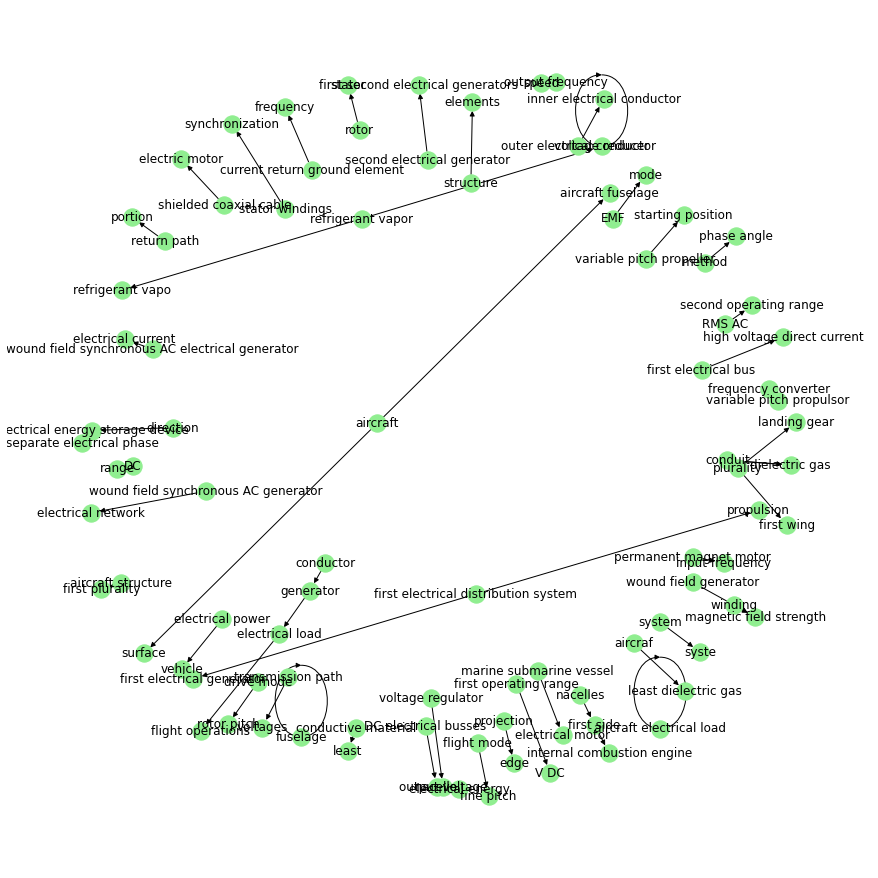

In [31]:
# Construction of Preliminary Knowledge Graph.

G=nx.from_pandas_edgelist(phrase_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='lightgreen', edge_cmap=plt.cm.Greens, pos = pos)
plt.show()